Proyecto Final
Este es un conjunto de datos públicos de comercio electrónico brasileño de pedidos realizados en Olist Store. 
El conjunto de datos tiene información de 100.000 pedidos de 2016,2017,2018 y 2020 realizados en varios mercados de Brasil.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Cargamos los archivos que usaremos para el analizis

df_customer = pd.read_csv('/Users/emilio/Documents/Proyecto Final/olist_customers_dataset.csv')
df_order_items = pd.read_csv('/Users/emilio/Documents/Proyecto Final/olist_order_items_dataset.csv')
df_products = pd.read_csv('/Users/emilio/Documents/Proyecto Final/olist_products_dataset.csv')
df_payments = pd.read_csv('/Users/emilio/Documents/Proyecto Final/olist_order_payments_dataset.csv')
df_orders = pd.read_csv('/Users/emilio/Documents/Proyecto Final/olist_orders_dataset.csv')

print(df_customer.head())
print(df_order_items.head())
print(df_products.head())
print(df_payments.head())
print(df_orders.head())

                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  
                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3          

In [3]:
# Estructura de los datos

print(df_customer.info())
print(df_order_items.info())
print(df_products.info())
print(df_payments.info())
print(df_orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  

In [4]:
# Estadisticas descriptivas

print(df_customer.describe())
print(df_order_items.describe())
print(df_products.describe())
print(df_payments.describe())
print(df_orders.describe())

       customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000
       order_item_id          price  freight_value
count  112650.000000  112650.000000  112650.000000
mean        1.197834     120.653739      19.990320
std         0.705124     183.633928      15.806405
min         1.000000       0.850000       0.000000
25%         1.000000      39.900000      13.080000
50%         1.000000      74.990000      16.260000
75%         1.000000     134.900000      21.150000
max        21.000000    6735.000000     409.680000
       product_name_lenght  product_description_lenght  product_photos_qty  \
count         32341.000000                32341.000000        32341.000000   
mean             48.476949                  771.495285            2.188986   
std              10

Transformación y Limpieza 

In [5]:
# Eliminaremos las columnas que no aportan valor
df_customer.drop(columns=["customer_unique_id"], inplace=True)
df_orders.drop(columns=["order_approved_at", "order_delivered_carrier_date"], inplace=True)
df_products.drop(columns=["product_name_lenght", "product_description_lenght", "product_photos_qty"], inplace=True)

# Estas columnas se eliminan porque no aportan valor significativo al análisis, ya que son identificadores o datos redundantes.

Unificación de los DataFrames

In [10]:
# Unir ordenes con clientes
df_merge = pd.merge(df_orders, df_customer, on="customer_id", how="inner")

# Unir con pagos
df_merge1 = pd.merge(df_merge, df_payments, on="order_id", how="inner")

# Unir con productos y detalles de orden
df_merge2 = pd.merge(df_merge1, df_order_items, on="order_id", how="inner")

# Unir con información de productos
df_merge3 = pd.merge(df_merge2, df_products, on="product_id", how="inner")

print(df_merge3.head())

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp order_delivered_customer_date  \
0    delivered      2017-10-02 10:56:33           2017-10-10 21:25:13   
1    delivered      2017-10-02 10:56:33           2017-10-10 21:25:13   
2    delivered      2017-10-02 10:56:33           2017-10-10 21:25:13   
3    delivered      2018-07-24 20:41:37           2018-08-07 15:27:45   
4    delivered      2018-08-08 08:38:49           2018-08-17 18:06:29   

  order_estimated_delivery_date  customer_zip_code_prefix customer_city  \
0           2017-10-18 00:00:00                

In [11]:
# No es necesario reemplazar valores nulos en 'price', ya que no tiene valores faltantes.

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_delivered_customer_date    2567
order_estimated_delivery_date       0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name            1698
product_weight_g                   20
product_length_cm                  20
product_height_cm                  20
product_width_cm                   20
dtype: int64


/var/folders/59/cmq4bv5j2cz8nmv_xs_d8vbc0000gn/T/ipykernel_5606/893031405.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merge3["price"].fillna(df_merge3["price"].mean(), inplace=True)


In [12]:
# Convertir columnas de fecha
df_merge3["order_purchase_timestamp"] = pd.to_datetime(df_merge3["order_purchase_timestamp"])
df_merge3["order_estimated_delivery_date"] = pd.to_datetime(df_merge3["order_estimated_delivery_date"])


In [14]:
# Eliminar duplicados
df_merge3.drop_duplicates(inplace=True)

print(df_merge3.info())
# Estas columnas se eliminan porque no aportan valor significativo al análisis, ya que son identificadores o datos redundantes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117601 entries, 0 to 117600
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       117601 non-null  object        
 1   customer_id                    117601 non-null  object        
 2   order_status                   117601 non-null  object        
 3   order_purchase_timestamp       117601 non-null  datetime64[ns]
 4   order_delivered_customer_date  117601 non-null  object        
 5   order_estimated_delivery_date  117601 non-null  datetime64[ns]
 6   customer_zip_code_prefix       117601 non-null  int64         
 7   customer_city                  117601 non-null  object        
 8   customer_state                 117601 non-null  object        
 9   payment_sequential             117601 non-null  int64         
 10  payment_type                   117601 non-null  object        
 11  

Analisis descriptivo

In [16]:
# Estadísticas de todas las variables numéricas
print(df_merge3.describe())


            order_purchase_timestamp  order_estimated_delivery_date  \
count                         117601                         117601   
mean   2017-12-30 16:19:35.878368256  2018-01-23 12:55:57.155126528   
min              2016-09-04 21:15:19            2016-10-20 00:00:00   
25%              2017-09-11 21:42:39            2017-10-03 00:00:00   
50%              2018-01-18 13:37:27            2018-02-14 00:00:00   
75%              2018-05-03 22:43:17            2018-05-25 00:00:00   
max              2018-09-03 09:06:57            2018-10-25 00:00:00   
std                              NaN                            NaN   

       customer_zip_code_prefix  payment_sequential  payment_installments  \
count             117601.000000       117601.000000         117601.000000   
mean               35051.793097            1.093528              2.939482   
min                 1003.000000            1.000000              0.000000   
25%                11310.000000            1.000000 

In [17]:
# Conteo de valores únicos por columna
print(df_merge3.nunique())

order_id                         98665
customer_id                      98665
order_status                         7
order_purchase_timestamp         98111
order_delivered_customer_date    95664
order_estimated_delivery_date      449
customer_zip_code_prefix         14976
customer_city                     4110
customer_state                      27
payment_sequential                  29
payment_type                         4
payment_installments                24
payment_value                    28938
order_item_id                       21
product_id                       32951
seller_id                         3095
shipping_limit_date              93317
price                             5968
freight_value                     6999
product_category_name               73
product_weight_g                  2204
product_length_cm                   99
product_height_cm                  102
product_width_cm                    95
dtype: int64


In [18]:
# Distribución de la cantidad de pedidos por cliente
print(df_merge3["customer_id"].value_counts())

customer_id
270c23a11d024a44c896d1894b261a83    63
13aa59158da63ba0e93ec6ac2c07aacb    38
9af2372a1e49340278e7c1ef8d749f34    29
92cd3ec6e2d643d4ebd0e3d6238f69e2    26
63b964e79dee32a3587651701a2b8dbf    24
                                    ..
6f2cf56878f7f82151b0ad02590192c0     1
3803547f820b1e10b7ad9c7985f06753     1
a046c690e0564ffde0ce611b5eee2c30     1
ad312389a098ceff46ce92c4595c06d0     1
f00bb12620b7b232233cace1b229db18     1
Name: count, Length: 98665, dtype: int64


In [20]:
# Ver la cantidad de órdenes por estado
print(df_merge3["order_status"].value_counts())

order_status
delivered      115035
shipped          1244
canceled          566
processing        375
invoiced          371
unavailable         7
approved            3
Name: count, dtype: int64


In [21]:
# Ver las categorías de productos más vendidos
print(df_merge3["product_category_name"].value_counts())

product_category_name
cama_mesa_banho                                  11823
beleza_saude                                      9972
esporte_lazer                                     8945
moveis_decoracao                                  8744
informatica_acessorios                            8082
                                                 ...  
portateis_cozinha_e_preparadores_de_alimentos       15
cds_dvds_musicais                                   14
pc_gamer                                            10
fashion_roupa_infanto_juvenil                        8
seguros_e_servicos                                   2
Name: count, Length: 73, dtype: int64


Analisis Estadistico

In [23]:
media = np.mean(df_merge3["price"])
desviacion = np.std(df_merge3["price"])

print("Media del precio:", media)
print("Desviación estándar del precio:", desviacion)

Media del precio: 120.82478329265908
Desviación estándar del precio: 184.47853835486535


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

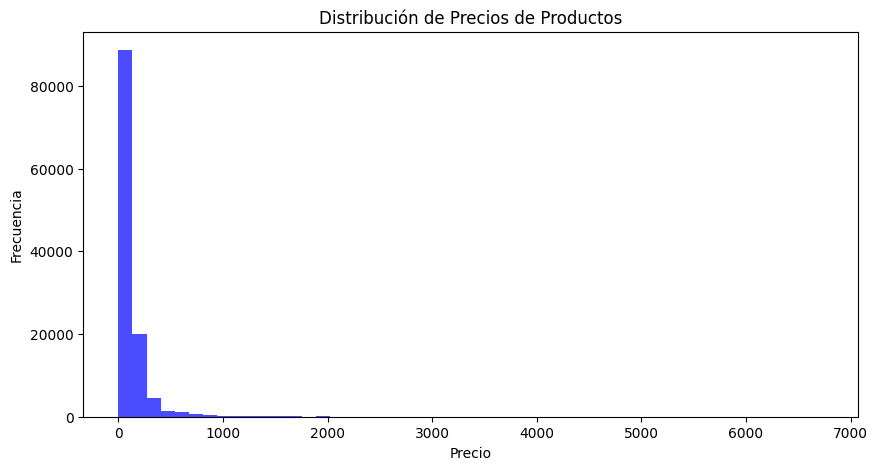

In [ ]:
# Histograma de precios de los productos

plt.figure(figsize=(10,5))
plt.hist(df_merge3["price"], bins=50, color="blue", alpha=0.7)
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.title("Distribución de Precios de Productos")
plt.show()

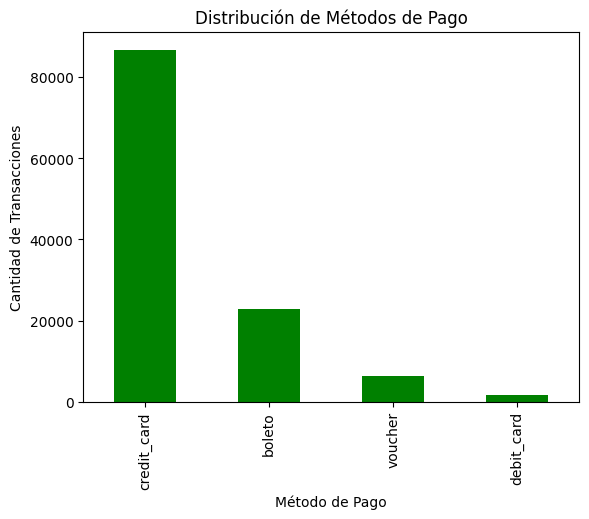

In [28]:
# Analisis de pago

df_merge3["payment_type"].value_counts().plot(kind="bar", color="green")
plt.xlabel("Método de Pago")
plt.ylabel("Cantidad de Transacciones")
plt.title("Distribución de Métodos de Pago")
plt.show()

In [29]:
df_merge3.to_excel("datos_finales.xlsx", index=False)
